# **Bioinformatics Project - Computational Drug Discovery [Part III ] Regression Models with Random Forest**

Nusrat Jahan

In this Jupyter notebook, we will be building a real-life **data science project**, we will be building a machine learning model using the ChEMBL bioactivity data.


In **Part III **, we will be building a regression model of PLK1 inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [56]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [57]:
df_PubChem = pd.read_csv('/content/PLK1_bioactivity_data_pIC50_pubchem_fp_named.csv')
df_PubChem

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,CHEMBL199996,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
1,CHEMBL115220,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.698970
2,CHEMBL199658,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.000000
3,CHEMBL199657,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.000000
4,CHEMBL382070,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.638272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,CHEMBL525907,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.885723
1209,CHEMBL559845,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.167491
1210,CHEMBL562104,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.375202
1211,CHEMBL563150,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000


### Renaming Name coulumn to chemblId

In [58]:
df_PubChem = df_PubChem.rename(columns = {'Name':'chemblId'})
df_PubChem

,chemblId,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,CHEMBL199996,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
1,CHEMBL115220,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.698970
2,CHEMBL199658,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.000000
3,CHEMBL199657,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.000000
4,CHEMBL382070,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.638272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,CHEMBL525907,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.885723
1209,CHEMBL559845,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.167491
1210,CHEMBL562104,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.375202
1211,CHEMBL563150,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000


### Normalizing the Fetearues

The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. The behaviors of the different scalers, transformers, and normalizers on a dataset containing marginal outliers is highlighted in Compare the effect of different scalers on data with outliers.

* Standardization, or mean removal and variance scaling

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) may assume that all features are centered around zero or have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [59]:
#df_pubchem_X = df_PubChem.drop(columns=['chemblId'])
df_pubchem_X= df_PubChem.drop(columns=['pIC50'])
df_pubchem_X

,chemblId,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL199996,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL115220,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL199658,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL199657,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL382070,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,CHEMBL525907,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1209,CHEMBL559845,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1210,CHEMBL562104,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1211,CHEMBL563150,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
from sklearn import preprocessing

def normalized (Fp):
    
    chemblId = Fp.chemblId
    Fp_loc = Fp.iloc[:,1:]
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(Fp_loc)
    Fp_normalized = pd.DataFrame(np_scaled)
    Fp_normalized
    Fp_normalized = pd.DataFrame(np_scaled, columns=Fp_loc.columns)
    Fp_normalized['chemblId'] = chemblId
    
    return Fp_normalized

In [61]:
Fp_pubchem_normalized = normalized (df_pubchem_X)

#### Saving into new csv file

In [62]:
Fp_pubchem_normalized.to_csv('Pubchem_normalized.csv', sep=',' ,index=False)
Fp_pubchem_normalized

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,chemblId
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL199996
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL115220
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL199658
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL199657
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL382070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL525907
1209,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL559845
1210,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL562104
1211,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHEMBL563150


### checking the variance of the features

In [63]:
Fp_pubchem_normalized = Fp_pubchem_normalized.drop(columns=['chemblId'])
Fp_pubchem_normalized

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1209,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1210,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1211,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
Fp_pubchem_normalized_variance = Fp_pubchem_normalized.var()
Fp_pubchem_normalized_variance

PubchemFP0      0.001647
PubchemFP1      0.004926
PubchemFP2      0.163272
PubchemFP3      0.155824
PubchemFP4      0.000000
                  ...   
PubchemFP876    0.000000
PubchemFP877    0.000000
PubchemFP878    0.000000
PubchemFP879    0.000000
PubchemFP880    0.000000
Length: 881, dtype: float64

In [10]:
Fp_pubchem_normalized_columns = Fp_pubchem_normalized.columns
Fp_pubchem_normalized_columns

Index(['PubchemFP0', 'PubchemFP1', 'PubchemFP2', 'PubchemFP3', 'PubchemFP4',
       'PubchemFP5', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8', 'PubchemFP9',
       ...
       'PubchemFP871', 'PubchemFP872', 'PubchemFP873', 'PubchemFP874',
       'PubchemFP875', 'PubchemFP876', 'PubchemFP877', 'PubchemFP878',
       'PubchemFP879', 'PubchemFP880'],
      dtype='object', length=881)

### Save into new files

In [11]:
print (len(Fp_pubchem_normalized))

1213


In [12]:
print (len(Fp_pubchem_normalized.columns ))

881


## Remove low variance Features

In [13]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.05):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

df_pubchem_X = remove_low_variance(Fp_pubchem_normalized, threshold=0.05)
df_pubchem_X
df_pubchem_X.var()

PubchemFP2      0.163272
PubchemFP3      0.155824
PubchemFP12     0.098989
PubchemFP16     0.154808
PubchemFP17     0.111546
                  ...   
PubchemFP819    0.068748
PubchemFP821    0.235806
PubchemFP824    0.083203
PubchemFP826    0.164725
PubchemFP833    0.165687
Length: 310, dtype: float64

In [14]:
df_pubchem_X.head()

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP16,PubchemFP17,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,...,PubchemFP800,PubchemFP805,PubchemFP812,PubchemFP813,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824,PubchemFP826,PubchemFP833
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Remove highly correlated features
In many datasets we find some of the features which are highly correlated that means which are some what linearly dependent with other features. These features contribute very less in predicting the output but increses the computational cost. 

In [15]:
from scipy import stats

def correlation(df, threshold):

    des3 = len(df.columns) 
    corr = stats.pearsonr
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname] # deleting the column from the dataset
    des4 = len(df.columns) 

    print('from Remove correlation')
    print("The initial set of " + str(des3) + ' descriptors'+ 
           " has been reduced to " + str(des4) + " descriptors.")

    return df

df = df_pubchem_X
threshold = 0.70 
df_pubchem_X_final = correlation(df, threshold)


from Remove correlation
The initial set of 310 descriptors has been reduced to 112 descriptors.


In [16]:
df_pubchem_X_final

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP16,PubchemFP17,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,...,PubchemFP716,PubchemFP721,PubchemFP728,PubchemFP734,PubchemFP737,PubchemFP749,PubchemFP750,PubchemFP756,PubchemFP758,PubchemFP776
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1209,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1210,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1211,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
df_pubchem_X_final.shape

(1213, 112)

In [64]:
df_pubchem_Y_final = df_PubChem['pIC50']
df_pubchem_Y_final

0       5.000000
1       4.698970
2       4.000000
3       4.000000
4       4.638272
          ...   
1208    5.885723
1209    7.167491
1210    5.375202
1211    5.000000
1212    5.244125
Name: pIC50, Length: 1213, dtype: float64

In [19]:
data_pubchem = pd.concat([df_pubchem_X_final,df_pubchem_Y_final], axis=1)
data_pubchem

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP16,PubchemFP17,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,PubchemFP33,...,PubchemFP721,PubchemFP728,PubchemFP734,PubchemFP737,PubchemFP749,PubchemFP750,PubchemFP756,PubchemFP758,PubchemFP776,pIC50
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.698970
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.638272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.885723
1209,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.167491
1210,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.375202
1211,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.000000


### Function for Machine Learning Model

In [20]:
! pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=7f69f1af4f3b3ff95cccfee06522140aaadfa6d69e8f43fc2c33ec681268d888
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [21]:
import sklearn
import numpy as np

In [28]:
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from collections import defaultdict


Q2_CV = []
RMSE_CV = []

R2_train = []
RMSE_train = []

Q2_test = []
RMSE_test = []

def build_model(X, Y, seed):
    
    
    #Data split using 70/30 ratio
    X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                        Y, test_size=0.3,
                                                        random_state=seed)

    # Training set
    # n_estimators = The number of trees in the forest
    # max_features = The number of features to consider when looking for the best split
    # min_samples_leaf = The minimum number of samples required to be at a leaf node
    # n_jobs = The number of jobs to run in parallel
    # random_state = Controls both the randomness of the bootstrapping of the samples used when building trees 

    rf = RandomForestRegressor(n_estimators=400, 
                               max_features='sqrt', 
                               min_samples_leaf = 1,
                               random_state = 13,
                               n_jobs=-1)
    
    rf.fit(X_train,Y_train)
    prediction = rf.predict(X_train)
    

    #A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. 
    # In the basic approach, called k-fold CV, the training set is split into k smaller sets 
    # (other approaches are described below, but generally follow the same principles). 
    # The following procedure is followed for each of the k “folds”:
    # A model is trained using k−1 of the folds as training data;
    # the resulting model is validated on the remaining part of the data 
    # (i.e., it is used as a test set to compute a performance measure such as accuracy).
    # The performance measure reported by k-fold cross-validation is then the average of 
    # the values computed in the loop. This approach can be computationally expensive, 
    # but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.
    # 10 fold Cross-validation
    #cv = cross_validate.cross_val_predict(rf, X_train, Y_train, cv=10, n_jobs=-1)
    
    # External set  
    prediction_test = rf.predict(X_test)
    
    #print result from each seed    
    R2_train.append(r2_score(Y_train, prediction))
    RMSE_train.append(np.sqrt(mean_absolute_error(Y_train, prediction)))
    #Q2_CV.append(r2_score(Y_train, cv))
    #RMSE_CV.append(np.sqrt(mean_absolute_error(Y_train, cv)))
    Q2_test.append(r2_score(Y_test, prediction_test))
    RMSE_test.append((mean_absolute_error(Y_test, prediction_test)))
    
    
    
    return R2_train, RMSE_train, Q2_test, RMSE_test 

In [29]:
X = df_pubchem_X_final
Y = df_pubchem_Y_final
seed = 100
build_model(X, Y, seed)


ValueError: ignored

In [ ]:
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from collections import defaultdict


R2_train = []
RMSE_train = []

Q2_test = []
RMSE_test = []

def build_model(X, Y, seed):
    
    
    #Data split using 70/30 ratio
    X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                        Y, test_size=0.3,
                                                        random_state=seed)

    # Training set
    # n_estimators = The number of trees in the forest
    # max_features = The number of features to consider when looking for the best split
    # min_samples_leaf = The minimum number of samples required to be at a leaf node
    # n_jobs = The number of jobs to run in parallel
    # random_state = Controls both the randomness of the bootstrapping of the samples used when building trees 

    rf = RandomForestRegressor(n_estimators=400, 
                               max_features='sqrt', 
                               min_samples_leaf = 1,
                               random_state = 13,
                               n_jobs=-1)
    
    rf.fit(X_train,Y_train)
    prediction = rf.predict(X_train)
    

    #A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. 
    # In the basic approach, called k-fold CV, the training set is split into k smaller sets 
    # (other approaches are described below, but generally follow the same principles). 
    # The following procedure is followed for each of the k “folds”:
    # A model is trained using k−1 of the folds as training data;
    # the resulting model is validated on the remaining part of the data 
    # (i.e., it is used as a test set to compute a performance measure such as accuracy).
    # The performance measure reported by k-fold cross-validation is then the average of 
    # the values computed in the loop. This approach can be computationally expensive, 
    # but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.
    # 10 fold Cross-validation
    #cv = cross_validate.cross_val_predict(rf, X_train, Y_train, cv=10, n_jobs=-1)
    
    # External set  
    prediction_test = rf.predict(X_test)
    
    #print result from each seed    
    R2_train.append(r2_score(Y_train, prediction))
    RMSE_train.append(np.sqrt(mean_absolute_error(Y_train, prediction)))
    #Q2_CV.append(r2_score(Y_train, cv))
    #RMSE_CV.append(np.sqrt(mean_absolute_error(Y_train, cv)))
    Q2_test.append(r2_score(Y_test, prediction_test))
    RMSE_test.append((mean_absolute_error(Y_test, prediction_test)))
    
    
    
    return X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

In [ ]:
X = df_pubchem_X_final
Y = df_pubchem_Y_final
seed = 100
build_model(X, Y, seed)

((1030, 85), (1030,), (442, 85), (442,))

In [ ]:
import sklearn
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from collections import defaultdict
import numpy as np

Q2_CV = []
RMSE_CV = []
R2_CV = []

R2_train = []
RMSE_train = []
Q2_train = []

R2_test = []
Q2_test = []
RMSE_test = []

def build_model(X, Y, seed):
    
    
    #Data split using 70/30 ratio
    X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                        Y, test_size=0.3,
                                                        random_state=seed)

    # Training set
    # n_estimators = The number of trees in the forest
    # max_features = The number of features to consider when looking for the best split
    # min_samples_leaf = The minimum number of samples required to be at a leaf node
    # n_jobs = The number of jobs to run in parallel
    # random_state = Controls both the randomness of the bootstrapping of the samples used when building trees 

    rf = RandomForestRegressor(n_estimators=400, 
                               max_features='sqrt', 
                               min_samples_leaf = 1,
                               random_state = 13,
                               n_jobs=-1)
    
    rf.fit(X_train,Y_train)
    prediction = rf.predict(X_train)
    

    #A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. 
    # In the basic approach, called k-fold CV, the training set is split into k smaller sets 
    # (other approaches are described below, but generally follow the same principles). 
    # The following procedure is followed for each of the k “folds”:
    # A model is trained using k−1 of the folds as training data;
    # the resulting model is validated on the remaining part of the data 
    # (i.e., it is used as a test set to compute a performance measure such as accuracy).
    # The performance measure reported by k-fold cross-validation is then the average of 
    # the values computed in the loop. This approach can be computationally expensive, 
    # but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.
    # 10 fold Cross-validation
    cv = sklearn.model_selection.cross_val_predict(rf, X_train, Y_train, cv=10, n_jobs=-1)
    

    Y_test = pd.DataFrame(Y_test) 
    Y_exp_plot = Y_test.to_csv('/content/Pubchem_pIC50_exp.csv', index=False)
    # External set  
    prediction_test = rf.predict(X_test)
    prediction_test = pd.DataFrame(prediction_test)
    Y_pred_plot = prediction_test.to_csv('/content/Pubchem_pIC50_pred.csv', index=False)

    #print result from each seed    
    R2_train.append(r2_score(Y_train, prediction))
    RMSE_train.append(np.sqrt(mean_absolute_error(Y_train, prediction)))
    Q2_CV.append(r2_score(Y_train, cv))
    RMSE_CV.append(np.sqrt(mean_absolute_error(Y_train, cv)))
    Q2_test.append(r2_score(Y_test, prediction_test))
    RMSE_test.append((mean_absolute_error(Y_test, prediction_test)))
    
    
    
    return Y_test, prediction_test, Y_exp_plot, Y_pred_plot

In [ ]:
X = df_pubchem_X_final
Y = df_pubchem_Y_final
seed = 100
build_model(X, Y, seed)

(         pIC50
 859   8.096910
 152   5.301030
 1468  8.494850
 1098  8.619789
 425   7.677781
 ...        ...
 680   5.924453
 1203  9.698970
 1390  9.154902
 380   5.725842
 644   4.559579
 
 [442 rows x 1 columns],             0
 0    7.131524
 1    6.236045
 2    7.152631
 3    8.252809
 4    7.256950
 ..        ...
 437  6.288941
 438  9.218116
 439  8.542768
 440  6.997890
 441  6.069134
 
 [442 rows x 1 columns], None, None)

## Scatter Plot of Experimental vs Predicted pIC50 Values** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

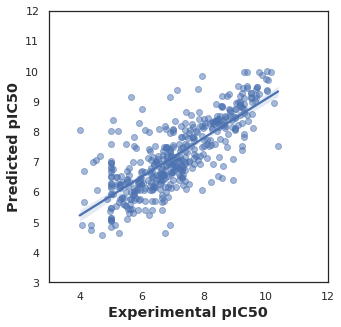

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


sns.set(color_codes=True)
sns.set_style("white")

Y_exp = pd.read_csv('/content/Pubchem_pIC50_exp.csv')
Y_pred = pd.read_csv('/content/Pubchem_pIC50_pred.csv')

ax = sns.regplot(Y_exp, Y_pred, scatter_kws={'alpha':0.5})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3, 12)
ax.set_ylim(3, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## Better way of the above code chunk

### Function for removing useless descriptors

In [52]:
import numpy as np

def Remove_useless_descriptor(df, threshold):
    
    des1 = len(df.columns) 
    
    h = df.columns.tolist()
    df = df.to_numpy().astype(np.float)
    df = np.array(df)

    STDEV = np.std(df, axis=0)
    idx = [idx for idx, val in enumerate(STDEV) if val > threshold]
    df2 = df[:,idx]
    hx = np.array(h)[idx]
    
    df = pd.DataFrame(df2, columns=[hx])
    
    des2 = len(df.columns)
    
    print('from Remove useless descriptor')
    print("The initial set of " + str(des1) + \
          " descriptors has been reduced to " + str(des2) + " descriptors.")
    
    return df, des1, des2

### Function for removing highly correlated data

In [34]:
from scipy import stats

def correlation(df, threshold):

    des3 = len(df.columns) 
    corr = stats.pearsonr
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname] # deleting the column from the dataset
    des4 = len(df.columns) 

    print('from Remove correlation')
    print("The initial set of " + str(des3) + ' descriptors'+ 
           " has been reduced to " + str(des4) + " descriptors.")

    return df, des3, des4

### Function for Random Forest Regression Model

In [77]:
import sklearn
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from collections import defaultdict
import numpy as np

def build_model(X, Y, seed, hx, f):
    
    
    #Data split using 70/30 ratio
    X_internal, X_external, Y_internal, Y_external = train_test_split(X,
                                                        Y, test_size=0.3,
                                                        random_state=seed)

    # Training set
    rf = RandomForestRegressor(n_estimators=400, 
                               max_features='sqrt', 
                               min_samples_leaf = 1,
                               random_state = 13,
                               n_jobs=-1)
    
    rf.fit(X_internal,Y_internal)
    prediction = rf.predict(X_internal)
    
    # Cross-validation
    cv = sklearn.model_selection.cross_val_predict(rf, X_internal, Y_internal, cv=10, n_jobs=-1)
    
    #cv = cross_validation.cross_val_predict(rf, X_internal, Y_internal, cv=10, n_jobs=-1)
    
    # External set  
    prediction_external = rf.predict(X_external)
    
    #print result from each seed    
    R2_train.append(r2_score(Y_internal, prediction))
    RMSE_train.append(np.sqrt(mean_absolute_error(Y_internal, prediction)))
    Q2_CV.append(r2_score(Y_internal, cv))
    RMSE_CV.append(np.sqrt(mean_absolute_error(Y_internal, cv)))
    Q2_External.append(r2_score(Y_external, prediction_external))
    RMSE_External.append((mean_absolute_error(Y_external, prediction_external)))
    
    #Feature Importance

    #feature_names = [f"feature {i}" for i in range(X.shape[1])]
    #importances = forest.feature_importances_
    #importances = pd.Series(importances, index=feature_names)

    Feature = [f"feature {i}" for i in range(hx.shape[0])]
    feature_importance = rf.feature_importances_
    #importances = 100.0 * (feature_importance / feature_importance.max()) #index
    importances = pd.Series(feature_importance, index=Feature)

    #Feature = hx[:]
    
    for i, fx in enumerate(Feature):
        importances_dict[fx].append(importances[i])
    
    return R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, Feature, \
           X_internal, X_external, Y_internal, Y_external, rf, prediction, importances_dict

### Function for Scrambling Y

In [36]:
from copy import deepcopy

def Y_scrambling(X_internal, X_external, Y_internal, Y_external):
    # Do the Y-scrambling. Loop over the actual learning for 100 times.
    for randomseedcounter in range(1,101):
        y_train_scrambled = deepcopy(Y_internal)
        X_train_scrambled = deepcopy(X_internal)
        np.random.shuffle(y_train_scrambled)
        np.random.shuffle(X_train_scrambled)

        # training was done on "scrambled" data - prediction on test set
        RF_scrambled         = RandomForestRegressor()
        RF_scrambled         = RF_scrambled.fit(X_internal,y_train_scrambled)
        y_predict_scrambled  = RF_scrambled.predict(X_external)
    
        acclist_predictionOnTest_scrambledtrain.append((RF_scrambled.score(X_external,Y_external))**2)
    
        # training was done on "scrambled" data - prediction on train set
        y_predict_scrambled_predictTrain  = RF_scrambled.predict(X_internal)
    
        acclist_predictionOnTrain_scrambledtrain.append((RF_scrambled.score(X_internal,Y_internal))**2)
        
        r2 = pd.DataFrame(acclist_predictionOnTrain_scrambledtrain, columns=['R2'])
        q2 = pd.DataFrame(acclist_predictionOnTest_scrambledtrain, columns=['Q2'])

        #result = pd.concat([r2, q2], axis=1, join='inner').to_csv(f+"_Y_scrambling.csv", header=False, index=False)
        
        
    return acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain

### Find the mean of the results of the Model output

In [80]:
def mean(R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, importances_dict):
    R2_train_mean = np.mean(R2_train)
    RMSE_train_mean = np.mean(RMSE_train)
    Q2_CV_mean = np.mean(Q2_CV)
    RMSE_CV_mean = np.mean(RMSE_CV)
    Q2_External_mean = np.mean(Q2_External)
    RMSE_External_mean = np.mean(RMSE_External)
    importances_mean0 = {}
    for fx in importances_dict:
        importances_mean0[fx] = np.mean(importances_dict[fx])
    importances_mean = sorted([(k,v) for k,v in importances_mean0.items()],
                                    key=lambda x: x[1], reverse=True)
    
    #predictionOnTest_mean = np.mean(acclist_predictionOnTest_scrambledtrain)
    #predictionOnTrain_mean = np.mean(acclist_predictionOnTrain_scrambledtrain)
    
    return R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, \
            RMSE_External_mean, importances_mean

            

### Find the standard deviation of the results of the Model output

In [79]:
def std(R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, importances_dict):
    R2_train_std = np.std(R2_train)
    RMSE_train_std = np.std(RMSE_train)
    Q2_CV_std = np.std(Q2_CV)
    RMSE_CV_std = np.std(RMSE_CV)
    Q2_External_std = np.std(Q2_External)
    RMSE_External_std = np.std(RMSE_External)
    importances_std0 = {}
    for fx in importances_dict:
        importances_std0[fx] = np.std(importances_dict[fx])
    importances_std = sorted([(k,v) for k,v in importances_std0.items()],
                                    key=lambda x: x[1], reverse=True)
    #predictionOnTest_std = np.std(acclist_predictionOnTest_scrambledtrain)
    #predictionOnTrain_std = np.std(acclist_predictionOnTrain_scrambledtrain)
    
    return R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std,\
            RMSE_External_std, importances_std

### Printing the text with results

In [85]:
def print_output(R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, 
           RMSE_External_mean, R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std, 
           RMSE_External_std, X_internal, X_external, X, f, des1, des2 ):
    #outfile = open('all_output.csv', 'a')
    name = [os.path.basename(f)]
    print_out = name
    print_out = [name.replace('.smi','') for name in print_out]
    
    print(outfile, '%s,%d,%d,%d,%d,%0.4f,%0.4f,%0.4f,%0.4f,%d,%0.4f,%0.4f,%0.4f,%0.4f,%d,%0.4f,%0.4f,%0.4f,%0.4f' \
                                     % (print_out, len(X_internal),
                                        des1, des2, des4,
                                        R2_train_mean, R2_train_std,
                                        RMSE_train_mean, RMSE_train_std,
                                        len(X_internal),
                                        Q2_CV_mean, Q2_CV_std,
                                        RMSE_CV_mean, RMSE_CV_std,
                                        len(X_external),
                                        Q2_External_mean, Q2_External_std,
                                        RMSE_External_mean, RMSE_External_std,))
 
    print('\nTraining set\n------------')
    print('N: ' + (str(len(X_internal))))
    print('R2: %0.4f'%(R2_train_mean))
    print('std_R2: %0.4f'%(R2_train_std))
    print('RMSE: %0.4f'%(RMSE_train_mean))
    print('std_RMSE: %0.4f'%(RMSE_train_std))

    print('\nCross-validation set\n------------')
    print('N: ' + (str(len(X_internal))))
    print('Q2: %0.4f'%(Q2_CV_mean))
    print('std_Q2: %0.4f'%(Q2_CV_std))
    print('RMSE: %0.4f'%(RMSE_CV_mean))
    print('std_RMSE: %0.4f'%(RMSE_CV_std))

    print('\nExternal set\n------------')
    print('N: ' + (str(len(X_external))))
    print('Q2_EXt: %0.4f'%(Q2_External_mean))
    print('std_Q2_EXt: %0.4f'%(Q2_External_std))
    print('RMSE: %0.4f'%(RMSE_External_mean))
    print('std_RMSE: %0.4f'%(RMSE_External_std))

### Plotting the results

In [40]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pylab as py 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

def plot_model (f, X_internal, X_external, Y_internal, Y_external,
                R2_train_mean, Q2_External_mean,
                importances_mean, importances_std, Feature, prediction, 
                acclist_predictionOnTest_scrambledtrain, acclist_predictionOnTrain_scrambledtrain):
    
    # Prepare plot
    m  = rf.fit(X_internal,Y_internal)
    cm = plt.cm.RdBu
    cv = sklearn.model_selection.cross_val_predict(rf, X_internal, Y_internal, cv=10, n_jobs=-1)
    
    #cv = cross_validation.cross_val_predict(rf, X_internal, Y_internal, cv=10, n_jobs=-1)

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0]=5
    fig_size[1]=5

    # Train Set
    x_train = np.array(Y_internal)
    y_train = m.predict(X_internal).flatten()
    py.scatter(x_train, y_train, s=50, marker='.', alpha=0.3,
            c='g', cmap=cm ,edgecolors='g')
                 #label=r"$R^{2}_{Tr}$ = %.4f" % R2_train_mean)
    
    
    # CV Set
    np.array(cv)
    x_test = np.array(Y_internal)
    y_test = cv
    py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
            c='b', cmap=cm ,edgecolors='b') 
                 #label=r"$Q^{2}_{Ext}$ = %.4f" % Q2_External_mean)
        #2SD line
    X = sm.add_constant(x_test)
    res = sm.OLS(y_test, X).fit()

    st, data, ss2 = summary_table(res, alpha=0.05)
    fittedvalues = data[:,2]
        #predict_mean_se  = data[:,3]
    predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
    predict_ci_low, predict_ci_upp = data[:,6:8].T
        #2SD line
    plt.plot(X, predict_ci_low, '--b', linewidth=0.5, alpha=0.5)
    plt.plot(X, predict_ci_upp, '--b', linewidth=0.5, alpha=0.5)
        
    # External Set
    x_test = np.array(Y_external)
    y_test = m.predict(X_external).flatten()
    py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
            c='r', cmap=cm ,edgecolors='r') 
                 #label=r"$Q^{2}_{Ext}$ = %.4f" % Q2_External_mean)
    
    
    #py.plot(x_train, np.polyval(np.polyfit(x_train,y_train,1), x_train), '--r') #mean line
    plt.legend(loc=2,prop={'size':6})
    plt.xlabel("Experimental $pIC_{50}$ values", fontsize=10)
    plt.ylabel("Predicted $pIC_{50}$ values", fontsize=10)
        
    min_axis = np.min(np.concatenate([Y_internal, prediction], axis=0))
    max_axis = np.max(np.concatenate([Y_internal, prediction], axis=0))
    plt.xlim([(min_axis*0.9),(max_axis*1.05)])
    plt.ylim([(min_axis*0.9),(max_axis*1.05)])
    plt.tick_params(axis='both', which='major', labelsize=14)

    
    # Save plot to file
    plt.savefig(f+'_compair_Fp.pdf', dpi=300)
    plt.show()
    
    # Y-scrambling plot
    py.scatter(Q2_CV_mean, R2_train_mean, s=100, marker='.', alpha=0.3,
            c='b', cmap=cm ,edgecolors='b') 
            
    py.scatter(acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain, \
               s=100, marker='.', alpha=0.3, c='r', cmap=cm ,edgecolors='r')

    plt.legend(loc=2,prop={'size':6})
    plt.xlabel("$Q^{2}$", fontsize=10)
    plt.ylabel("$R^{2}$", fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=14)
    
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.axhline(0.5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
    plt.axvline(0.5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
    
    plt.savefig(f+'_Y_scrambling.pdf', dpi=300)

    plt.show()

    #Feature Importance 
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0]=5
    fig_size[1]=10

    barlist = plt.barh(range(20), [x[1] for x in importances_mean[:20]], 
          color="g", xerr=[x[1] for x in importances_std[:20]], align="center", \
                       error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))

    print (str("top10"), [x[0] for x in importances_mean[:10]])
    print ('')
    print (str("top20"), [x[0] for x in importances_mean[:20]])
    print ('')
    print (str("top30"), [x[0] for x in importances_mean[:30]])
    print ('')
    print (str("top40"), [x[0] for x in importances_mean[:40]])
    print ('')
    print (str("top50"), [x[0] for x in importances_mean[:50]])
    
    plt.yticks(range(20), [x[0] for x in importances_mean[:20]])
    plt.ylim([-1, 20])
    
    plt.xlabel(r"$\bf{Gini}$" + " "+ r"$\bf{index}$", fontsize=12)
    ax = plt.gca()
    ax.invert_yaxis()
    plt.tight_layout(pad=2.0, w_pad=0.7, h_pad=2.0)
    plt.savefig(f+'_Feature_importances.pdf', dpi=300)
    plt.show()

### Constructing the QSAR Model

In [42]:
! pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 432 kB/s 


In [70]:
df_pubchem_normalized_new = pd.concat([Fp_pubchem_normalized,df_pubchem_Y_final], axis=1)
df_pubchem_normalized_new

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.698970
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.638272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.885723
1209,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.167491
1210,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.375202
1211,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000


In [68]:
df_pubchem_normalized_new.to_csv('PLK1_pIC50_pubchemfp_normalized.csv', index=False)

<_io.TextIOWrapper name='/content/PLK1_pIC50_output.csv' mode='a' encoding='UTF-8'> Filename,N_train,Descriptors,Remove STDEV,Remove correlation,R2_train,R2_train_std,MAE_train,MAE_train_std,N_CV,Q2_CV,Q2_CV_std,MAE_CV,MAE_CV_std,N_External,Q2_External,Q2_External_std,MAE_External,MAE_External_std


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  




************************************************************************************

/content/PLK1_pIC50_pubchemfp_normalized.csv

from Remove useless descriptor
The initial set of 881 descriptors has been reduced to 511 descriptors.
from Remove correlation
The initial set of 511 descriptors has been reduced to 193 descriptors.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


<_io.TextIOWrapper name='/content/PLK1_pIC50_output.csv' mode='a' encoding='UTF-8'> ['PLK1_pIC50_pubchemfp_normalized.csv'],849,881,511,193,0.9820,0.0007,0.3705,0.0043,849,0.8623,0.0031,0.6181,0.0054,364,0.8822,0.0084,0.3540,0.0166

Training set
------------
N: 849
R2: 0.9820
std_R2: 0.0007
RMSE: 0.3705
std_RMSE: 0.0043

Cross-validation set
------------
N: 849
Q2: 0.8623
std_Q2: 0.0031
RMSE: 0.6181
std_RMSE: 0.0054

External set
------------
N: 364
Q2_EXt: 0.8822
std_Q2_EXt: 0.0084
RMSE: 0.3540
std_RMSE: 0.0166


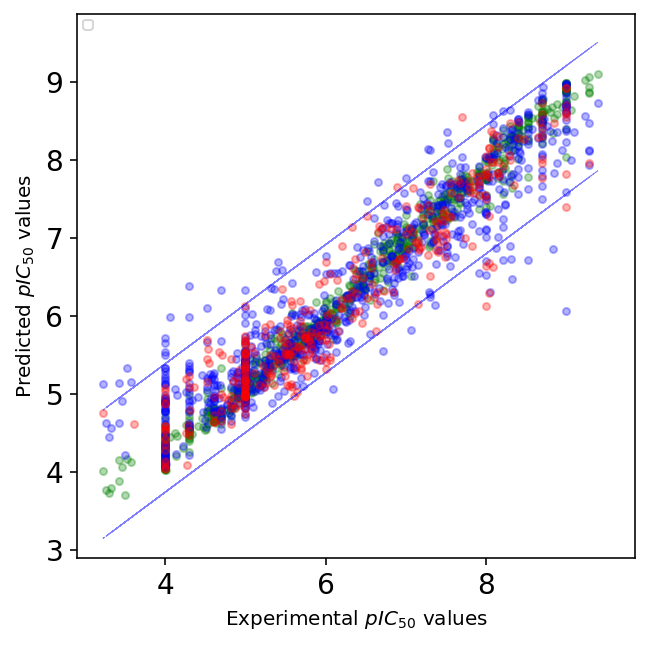

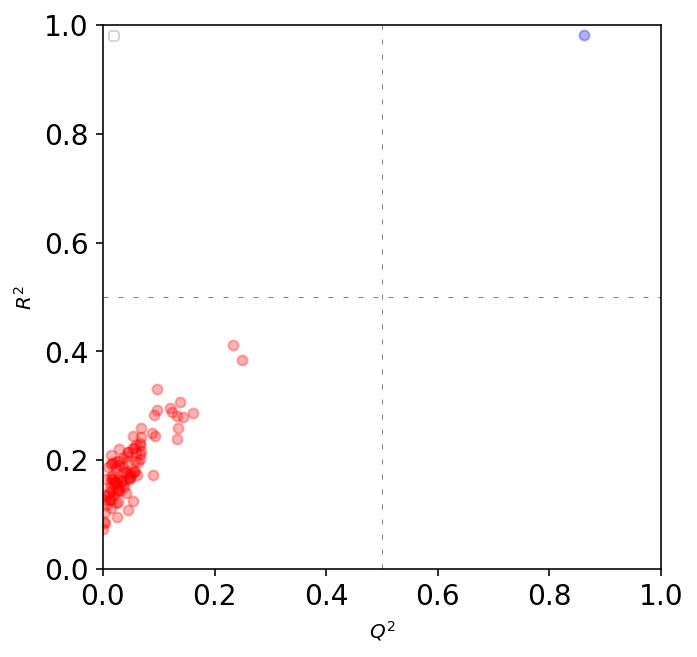

top10 ['feature 192', 'feature 91', 'feature 78', 'feature 144', 'feature 69', 'feature 145', 'feature 108', 'feature 126', 'feature 1', 'feature 83']

top20 ['feature 192', 'feature 91', 'feature 78', 'feature 144', 'feature 69', 'feature 145', 'feature 108', 'feature 126', 'feature 1', 'feature 83', 'feature 57', 'feature 115', 'feature 158', 'feature 185', 'feature 15', 'feature 29', 'feature 71', 'feature 54', 'feature 27', 'feature 9']

top30 ['feature 192', 'feature 91', 'feature 78', 'feature 144', 'feature 69', 'feature 145', 'feature 108', 'feature 126', 'feature 1', 'feature 83', 'feature 57', 'feature 115', 'feature 158', 'feature 185', 'feature 15', 'feature 29', 'feature 71', 'feature 54', 'feature 27', 'feature 9', 'feature 94', 'feature 151', 'feature 90', 'feature 66', 'feature 111', 'feature 167', 'feature 112', 'feature 125', 'feature 161', 'feature 149']

top40 ['feature 192', 'feature 91', 'feature 78', 'feature 144', 'feature 69', 'feature 145', 'feature 108', 'fea

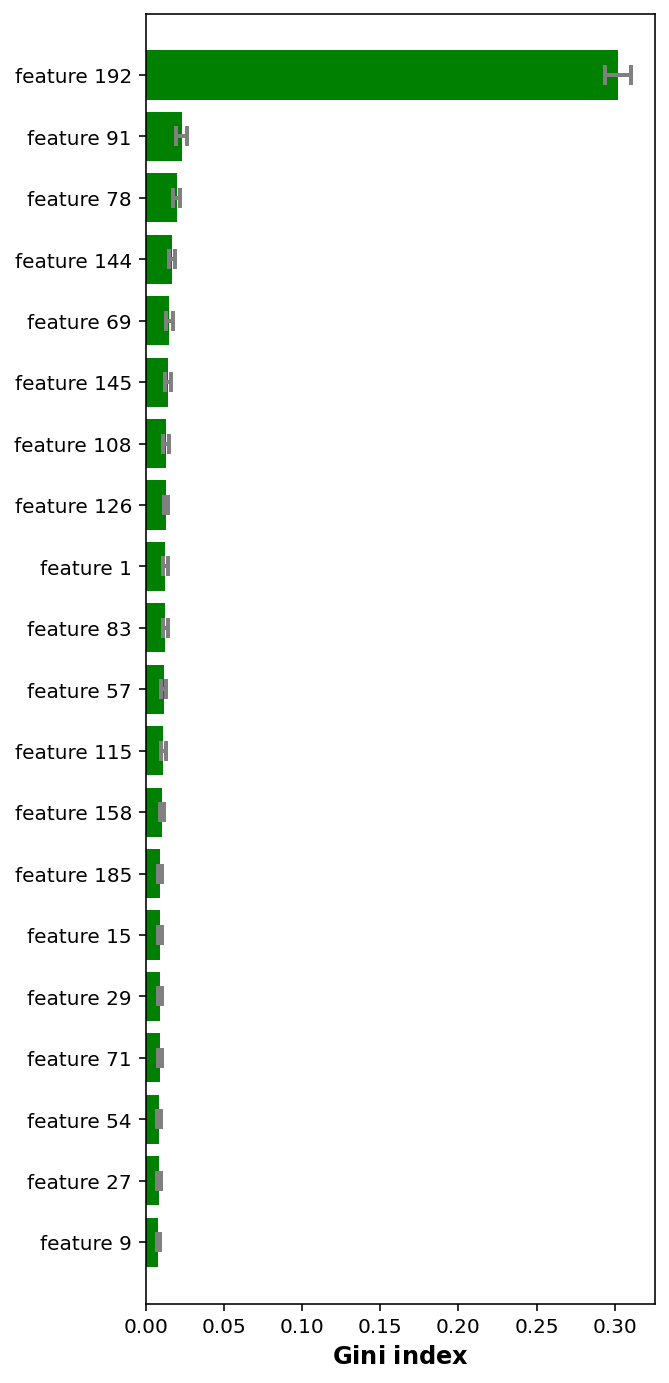

In [86]:
import glob # to read multiple files 
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import os

%config InlineBackend.figure_format = 'retina'

outfile = open('/content/PLK1_pIC50_output.csv', 'a')

print(outfile, 'Filename,N_train,Descriptors,Remove STDEV,Remove correlation,'+\
                    'R2_train,R2_train_std,' + \
                    'MAE_train,MAE_train_std,N_CV,Q2_CV,Q2_CV_std,MAE_CV,' + \
                    'MAE_CV_std,N_External,Q2_External,Q2_External_std,MAE_External,MAE_External_std')



for f in glob.glob('/content/PLK1_pIC50_pubchemfp_normalized.csv'):
    df = pd.read_csv(f)
    df = df.apply(lambda x: pd.to_numeric(x,errors='ignore'))
    df = df.fillna(method='ffill')
    Y = df["pIC50"].to_numpy().astype(np.float)
    data = df.iloc[:,1:]
    
    print('\n\n************************************************************************************')
    print('')
    print(f)
    print('')
    
    data, des1, des2 = Remove_useless_descriptor(data, 0.05)  # Remove correlation cut off 95%
    data, des3, des4 = correlation(data, 0.7)  # Remove correlation cut off 0.7

    h = data.columns.tolist()
    hx = np.array(h)

    data = data.to_numpy().astype(np.float)
    X = np.array(data)
    
    # Prepare empty lists to plot QSAR model
    R2_train = []
    RMSE_train = []
    Q2_CV = []
    RMSE_CV = []
    Q2_External = []
    RMSE_External = []
    importances_dict = defaultdict(list)
    
    # Prepare empty lists to plot the performance of accuracy.
    acclist_realRF                          = []
    acclist_realRF_predictTrain             = []
    acclist_predictionOnTest_scrambledtrain  = []
    acclist_predictionOnTrain_scrambledtrain = []
        
    for i in range(10):
        R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, Feature, \
           X_internal, X_external, Y_internal, Y_external, rf, prediction, importances_dict = build_model(X, Y, i, hx, f)
            
    acclist_predictionOnTest_scrambledtrain, acclist_predictionOnTrain_scrambledtrain = Y_scrambling( \
                                                                        X_internal, X_external, Y_internal, Y_external)
    R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, \
        RMSE_External_mean, importances_mean = mean(R2_train, RMSE_train, Q2_CV, RMSE_CV, \
                                 Q2_External, RMSE_External, importances_dict)
    R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std,\
        RMSE_External_std, importances_std = std(R2_train, RMSE_train, Q2_CV, RMSE_CV, \
                                 Q2_External, RMSE_External, importances_dict)
    print_output(R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, 
           RMSE_External_mean, R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std, 
           RMSE_External_std, X_internal, X_external, X, f, des1, des2)
    plot_model(f, X_internal, X_external, Y_internal, Y_external,
                R2_train_mean, Q2_External_mean,
                importances_mean, importances_std, Feature, prediction,
                acclist_predictionOnTest_scrambledtrain, acclist_predictionOnTrain_scrambledtrain)
    
outfile.close()
    #END

### PubChem fingerprints' descriptors 
https://web.cse.ohio-state.edu/~zhang.10631/bak/drugreposition/list_fingerprints.pdf

The PubChem System generates a binary substructure fingerprint for
chemical structures.  These fingerprints are used by PubChem for
similarity neighboring and similarity searching.
A substructure is a fragment of a chemical structure.  A fingerprint
is an ordered list of binary (1/0) bits.  Each bit represents a
Boolean determination of, or test for, the presence of, for example,
an element count, a type of ring system, atom pairing, atom
environment (nearest neighbors), etc., in a chemical structure.